In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", sep=',')
df.columns = ['Time, seconds', 'Series values, dB']

In [3]:
df.head()

,"Time, seconds","Series values, dB"
0,0.0000,-117
1,0.0001,46
2,0.0002,-478
3,0.0003,2
4,0.0004,4


In [4]:
from scipy.signal import savgol_filter
df['Series values, dB filtered'] = savgol_filter(df['Series values, dB'], 101, 2)

In [5]:
df.head()

,"Time, seconds","Series values, dB","Series values, dB filtered"
0,0.0000,-117,-272.568433
1,0.0001,46,-264.911474
2,0.0002,-478,-257.344512
3,0.0003,2,-249.867549
4,0.0004,4,-242.480585


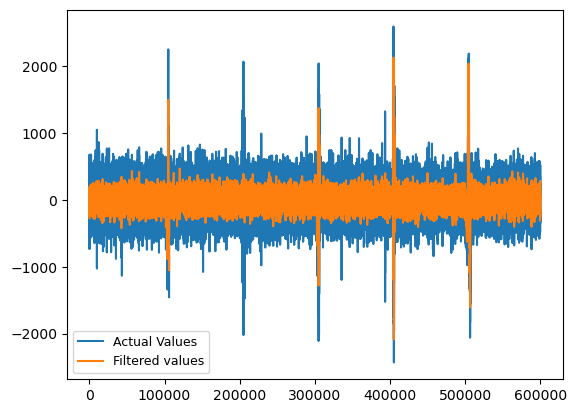

In [6]:
plt.plot(df['Series values, dB'], label = 'Actual Values')
plt.plot(df['Series values, dB filtered'], label = 'Filtered values')
plt.legend(loc="best", fontsize=9);

In [7]:
window_size = 10
mean = df['Series values, dB filtered'].ewm(window_size).mean()
std = df['Series values, dB filtered'].ewm(window_size).std()

In [8]:
std[0] = 0 #the first value turns into NaN because of no data
mean_plus_std = mean + 2*std
mean_minus_std = mean - 2*std

In [9]:
is_outlier = (df['Series values, dB filtered'] > mean_plus_std) | (df['Series values, dB filtered'] < mean_minus_std)
outliers = df[is_outlier]

In [10]:
outliers

,"Time, seconds","Series values, dB","Series values, dB filtered"
10741,1.074102,73,-2.422739
20766,2.076603,36,-32.930763
20805,2.080503,-124,-50.808729
23201,2.320104,-58,-61.224696
23204,2.320404,-145,-55.952257
...,...,...,...
548783,54.878391,-70,-69.196138
548787,54.878791,138,-52.886860
549537,54.953792,-315,-77.623363
554509,55.450992,-58,-5.779452


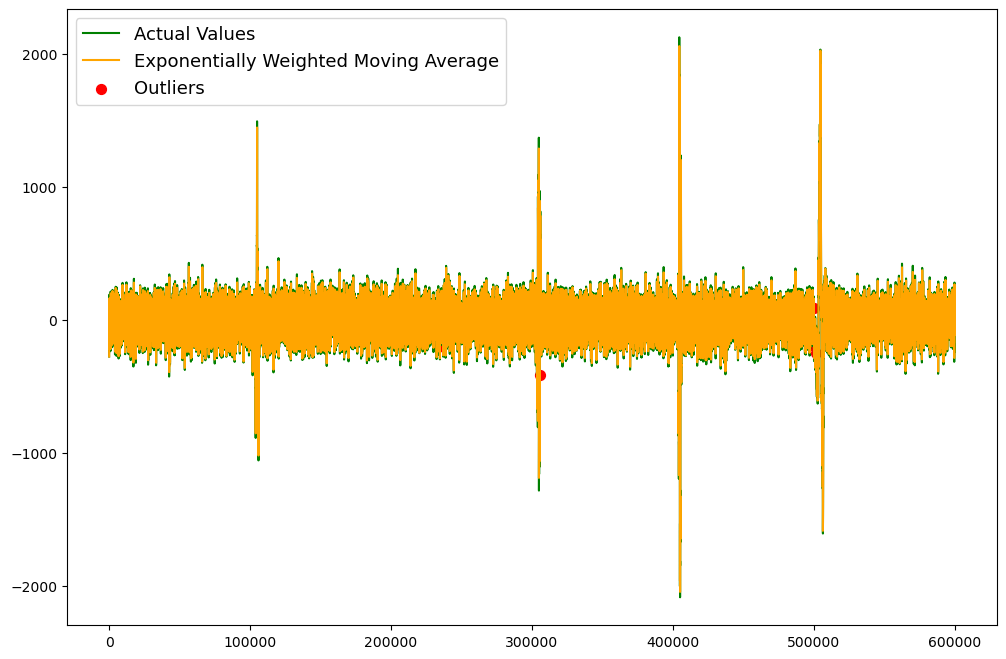

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(df['Series values, dB filtered'], c = 'green', label = 'Actual Values')
plt.plot(mean, c = 'orange', label = 'Exponentially Weighted Moving Average')
plt.scatter(outliers.index, outliers['Series values, dB filtered'], c = 'r', marker = 'o', s = 50, label = 'Outliers')
plt.legend(loc="best", fontsize=13);

In [12]:
df['Time, seconds'] = df['Time, seconds']*10000

# Преобразование столбца 'Time, seconds' в объекты datetime
df['Time, seconds'] = pd.to_datetime(df['Time, seconds'], unit='s')

# Установка столбца времени в качестве индекса
df.set_index('Time, seconds', inplace=True)

# Агрегация данных по дням и усреднение значений
aggregated_df = df.resample('H').mean()

In [13]:
aggregated_df.head()

,"Series values, dB","Series values, dB filtered"
"Time, seconds",,
1970-01-01 00:00:00,-6.653889,-6.466856
1970-01-01 01:00:00,2.231389,1.973977
1970-01-01 02:00:00,-1.971389,-1.876274
1970-01-01 03:00:00,-2.823889,-2.959771
1970-01-01 04:00:00,-4.300556,-3.788841


In [14]:
mean1 = aggregated_df['Series values, dB filtered'].ewm(window_size).mean()
std1 = aggregated_df['Series values, dB filtered'].ewm(window_size).std()

In [15]:
std1[0] = 0 #the first value turns into NaN because of no data
mean_plus_std1 = mean1 + 2*std1
mean_minus_std1 = mean1 - 2*std1

In [16]:
is_outlier1 = (aggregated_df['Series values, dB filtered'] > mean_plus_std1) | (aggregated_df['Series values, dB filtered'] < mean_minus_std1)
outliers1 = aggregated_df[is_outlier1]

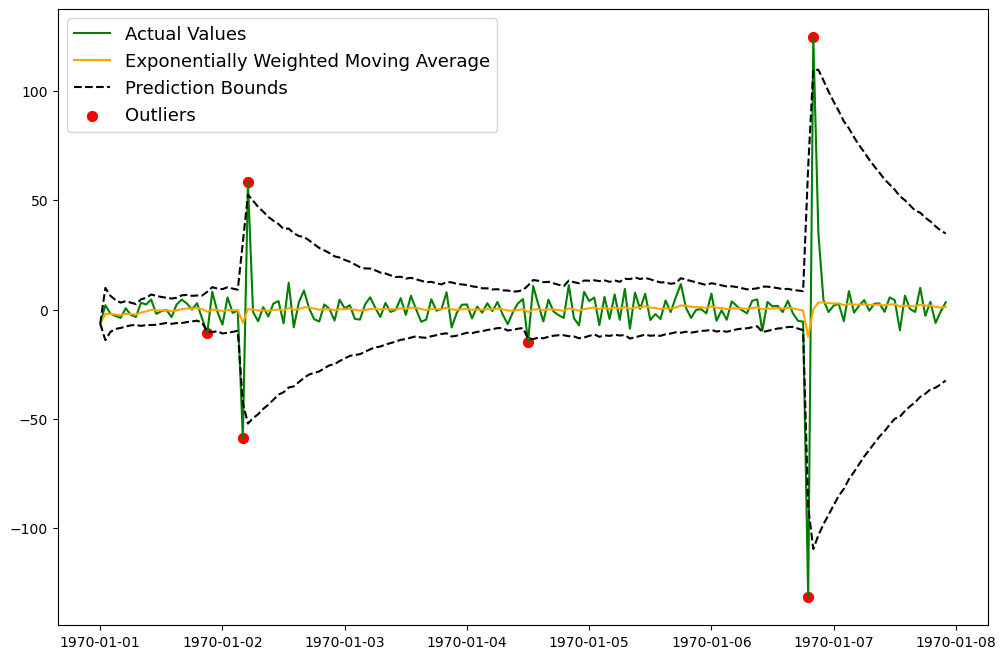

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(aggregated_df['Series values, dB filtered'], c = 'green', label = 'Actual Values')
plt.plot(mean1, c = 'orange', label = 'Exponentially Weighted Moving Average')
plt.plot(mean_plus_std1, 'k--', label = 'Prediction Bounds')
plt.plot(mean_minus_std1, 'k--')
plt.scatter(outliers1.index, outliers1['Series values, dB filtered'], c = 'r', marker = 'o', s = 50, label = 'Outliers')
plt.legend(loc="best", fontsize=13);

In [18]:
outliers1

,"Series values, dB","Series values, dB filtered"
"Time, seconds",,
1970-01-01 21:00:00,-10.454444,-10.792589
1970-01-02 04:00:00,-58.871944,-58.979082
1970-01-02 05:00:00,58.435833,58.143883
1970-01-04 12:00:00,-14.494444,-14.821203
1970-01-06 19:00:00,-131.897778,-131.611505
1970-01-06 20:00:00,124.280833,124.518698


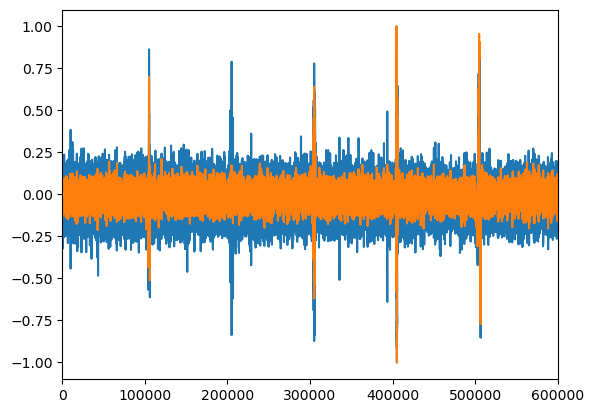

NameError: name 'write' is not defined

In [19]:
a = df['Series values, dB'].values
b = df['Series values, dB filtered'].values

# Rescale data to range [-1, 1]
a_rescaled = 2 * ((a - a.min()) / (a.max() - a.min())) - 1
b_rescaled = 2 * ((b - b.min()) / (b.max() - b.min())) - 1

# Plot data
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

plt.plot(a_rescaled)
plt.plot(b_rescaled)
plt.xlim([0, 600704])
plt.show()

# Write audio file
sampling_rate = 40000
write('w1.wav', sampling_rate, a_rescaled.astype(np.float32))
write('w2.wav', sampling_rate, b_rescaled.astype(np.float32))